#### Handwritten digits classification - CNN

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

(60000, 28, 28, 1)

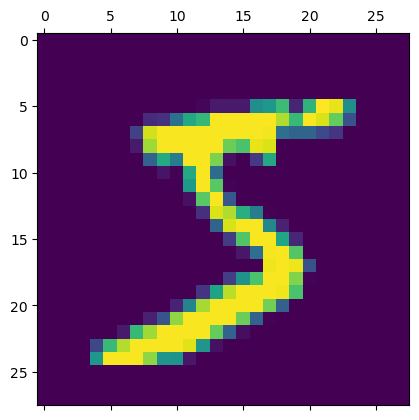

In [18]:
# Data Loading and Preprocessing - similar to ANN
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
plt.matshow(x_train[0])

# Scalling down the data to range 0-1
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0
x_train_scaled = x_train_scaled.reshape(-1, 28, 28, 1)
x_test_scaled = x_test_scaled.reshape(-1, 28, 28, 1)

x_train_scaled.shape

In [15]:
# CNN Model
model = keras.models.Sequential([
    # cnn
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    # flatten
    keras.layers.Flatten(),
    
    # dense
    keras.layers.Dense(units=800, activation='relu'),
    keras.layers.Dense(units=100, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
model.fit(x_train_scaled, y_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1200 - accuracy: 0.9623
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0403 - accuracy: 0.9876
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0276 - accuracy: 0.9917
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0209 - accuracy: 0.9933
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0158 - accuracy: 0.9952
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0119 - accuracy: 0.9963
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0106 - accuracy: 0.9967
Epoch 8/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0114 - accuracy: 0.9965
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0076 - accuracy: 0.9975
Epoch 10/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.007

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 800)               1280800   
_________________________________________________________________
dense_10 (Dense)             (None, 100)              

In [21]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2106 - accuracy: 0.9871


[0.21059109270572662, 0.9871000051498413]

Text(50.722222222222214, 0.5, 'Truth')

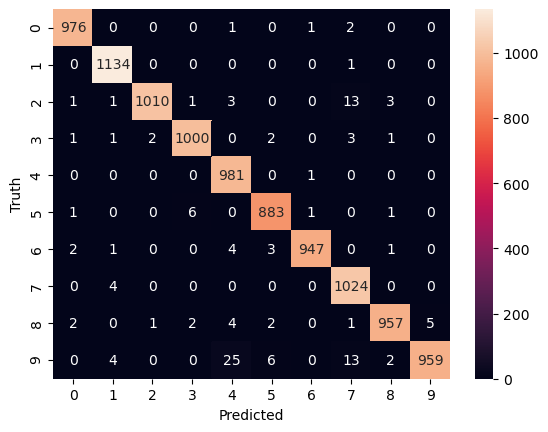

In [22]:
y_predicted = model.predict(x_test_scaled)
y_predicted_labels = [np.argmax(i).item() for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')